# Work on Twitter Analysis 

In [17]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import re
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
df1 = pd.read_csv('TwitterData1.csv')
df2 = pd.read_csv('TwitterData2.csv')
df3 = pd.read_csv('TwitterData3.csv')
df4 = pd.read_csv('TwitterData4.csv')

In [10]:
df = pd.concat([df1,df2,df3,df4])

In [11]:
df.head()

,Unnamed: 0,Tweet,Length,Is_RT,ID,Date,Source,Retweets
0,0,There is no empirical study to prove how many ...,277,1,1293811713494507521,2020-08-13 07:28:45,Twitter for Android,35
1,1,"PARAKH, a standard-setting body will be set up...",292,1,1293811532401278977,2020-08-13 07:28:01,Twitter for Android,40
2,2,"CBSE 2009 (Class 12) \n~6.5 L candidates, ~100...",278,1,1293810596148740096,2020-08-13 07:24:18,Twitter for Android,9
3,3,#WhatIf I was asked what I am feeling?\n@Dream...,240,0,1293810149866352640,2020-08-13 07:22:32,Twitter for Android,0
4,4,"CBSE 2009 (Class 12) \n~6.5 L candidates, ~100...",278,1,1293808205202522113,2020-08-13 07:14:48,Twitter for Android,9


In [12]:
## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [40]:
Clean_Tweet = []
for i in df.Tweet:
    Clean_Tweet.append(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", i.lower()).split()))
df['Clean_Tweet'] = Clean_Tweet

In [41]:
Processed_Text = []
wordLemm = WordNetLemmatizer()

tweetwords = ''
for tweet in df['Clean_Tweet']:
    for word in tweet.split():
        if len(word) > 1:
            word = wordLemm.lemmatize(word)
            tweetwords += (word+' ')
    Processed_Text.append(tweetwords)

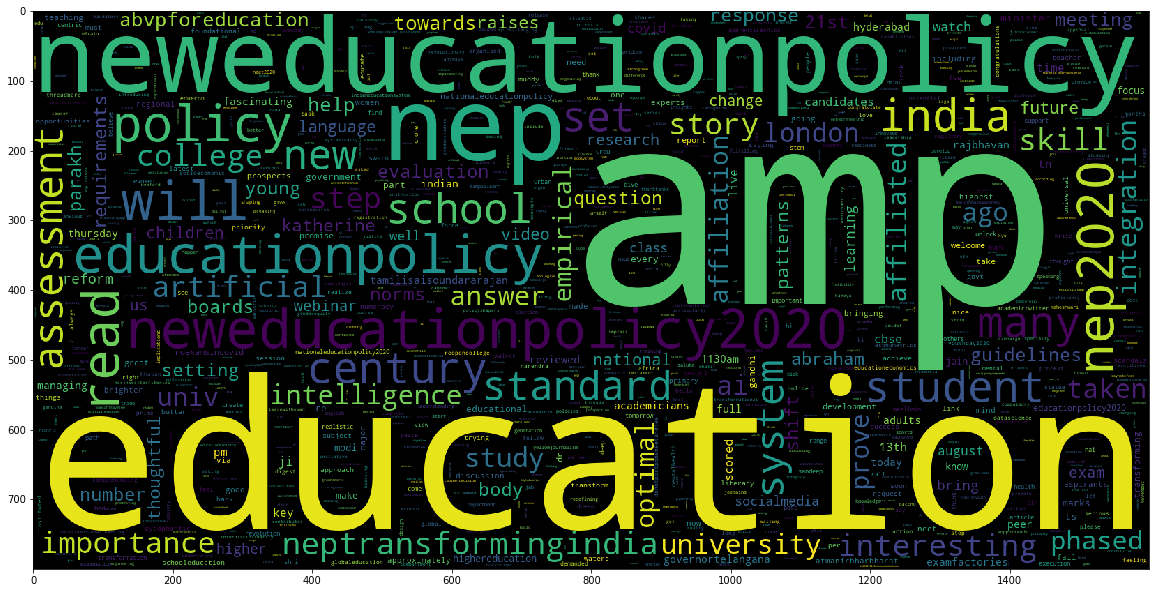

In [15]:
data_pos = Clean_Tweet[:80000]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

## BASIC ANALYSIS
Let's have a look at the count for highly relative words to our topic:

In [44]:
count = 0
for i in df.Clean_Tweet:
    if 'education' in i:
        count = count + 1
print(count)

349


In [45]:
count = 0
for i in df.Clean_Tweet:
    if 'system' in i:
        count = count + 1
print(count)

62


In [46]:
count = 0
for i in df.Clean_Tweet:
    if 'generation' in i:
        count = count + 1
print(count)

4


In [47]:
count = 0
for i in Clean_Tweet:
    if 'bad' in i:
        count = count + 1
print(count)

18


## EXPLORATORY DATA ANALYSIS

In [53]:
Android_User = len(df[df['Source'] == 'Twitter for Android'])
Iphone_1 = len(df[df['Source'] == 'Twitter for iPhone'])
Iphone_2 = len(df[df['Source'] == 'Twitter for iPad'])
Iphone_Users = Iphone_1 + Iphone_2
Rest = len(df) - (Android_User + Iphone_Users)
print(Android_User)
print(Iphone_Users)
print(Rest)

238
52
110


Text(0.5, 1.0, 'Tweets Across Phone Users')

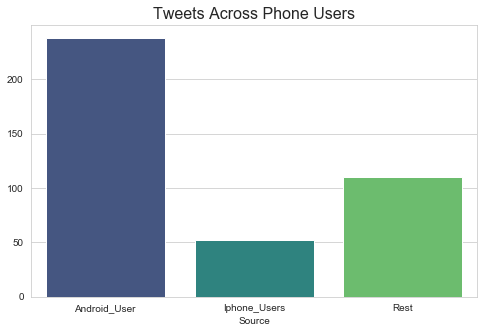

In [59]:
x = ['Android_User', 'Iphone_Users', 'Rest']
y = [Android_User, Iphone_Users, Rest]
plt.figure(figsize = (8,5))
sns.set_style('whitegrid')
sns.barplot(x, y, palette = 'viridis')
plt.xlabel('Source')
plt.title('Tweets Across Phone Users', size = 16)

In [54]:
# Total Retweets by specific user.
Retweets_for_Android = df[df['Source'] == 'Twitter for Android']['Retweets'].sum()
Retweets_for_IOS = df[df['Source'] == 'Twitter for iPhone']['Retweets'].sum()
Retweets_for_Rest = df['Retweets'].sum() - (df[df['Source'] == 'Twitter for Android']['Retweets'].sum() + 
                                            df[df['Source'] == 'Twitter for iPhone']['Retweets'].sum())
print(Retweets_for_Android)
print(Retweets_for_IOS)
print(Retweets_for_Rest)

19765
3959
3332


Text(0.5, 1.0, 'Retweets Across Phone Users')

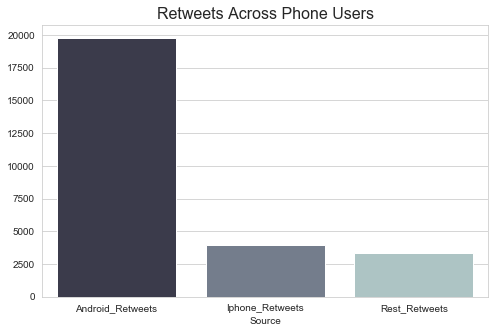

In [61]:
x = ['Android_Retweets', 'Iphone_Retweets', 'Rest_Retweets']
y = [Retweets_for_Android, Retweets_for_IOS, Retweets_for_Rest]
plt.figure(figsize = (8,5))
sns.set_style('whitegrid')
sns.barplot(x, y, palette = 'bone')
plt.xlabel('Source')
plt.title('Retweets Across Phone Users', size = 16)

In [55]:
#Average number of retweets by specific user.
Avg_RT_Android = Retweets_for_Android/Android_User
Avg_RT_IOS = Retweets_for_IOS/Iphone_Users
Avg_RT_Rest = Retweets_for_Rest/Rest
print(Avg_RT_Android)
print(Avg_RT_IOS)
print(Avg_RT_Rest)

83.04621848739495
76.13461538461539
30.29090909090909


Text(0.5, 1.0, 'Average Retweets Across Phone Users')

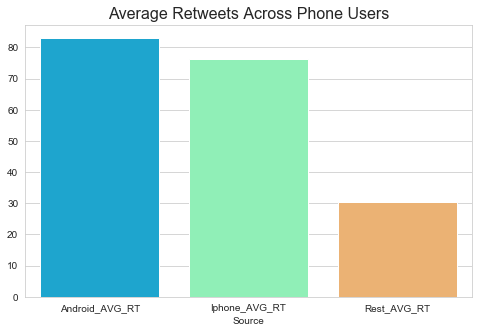

In [72]:
x = ['Android_AVG_RT', 'Iphone_AVG_RT', 'Rest_AVG_RT']
y = [Avg_RT_Android, Avg_RT_IOS, Avg_RT_Rest]
plt.figure(figsize = (8,5))
sns.set_style('whitegrid')
sns.barplot(x, y, palette = 'rainbow')
plt.xlabel('Source')
plt.title('Average Retweets Across Phone Users', size = 16)

In [56]:
# Length of txts actually typed by a specific user.
Length_of_txt_And = df[df['Source'] == 'Twitter for Android']['Length'].sum()
Length_of_txt_IOS = df[df['Source'] == 'Twitter for iPhone']['Length'].sum()
Length_of_txt_Rest = df['Length'].sum() - (df[df['Source'] == 'Twitter for Android']['Length'].sum() + 
                     df[df['Source'] == 'Twitter for iPhone']['Length'].sum())
print(Length_of_txt_And)
print(Length_of_txt_IOS)
print(Length_of_txt_Rest)

58022
9660
26797


Text(0.5, 1.0, 'Average Retweets Across Phone Users')

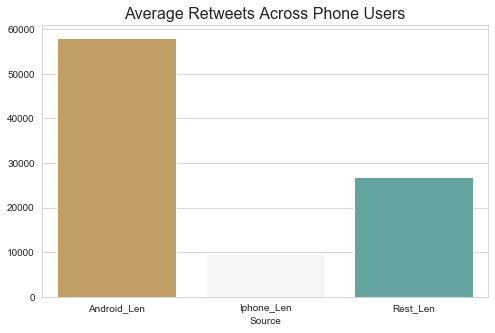

In [77]:
x = ['Android_Len', 'Iphone_Len', 'Rest_Len']
y = [Length_of_txt_And, Length_of_txt_IOS, Length_of_txt_Rest]
plt.figure(figsize = (8,5))
sns.set_style('whitegrid')
sns.barplot(x, y, palette = 'BrBG')
plt.xlabel('Source')
plt.title('Average Retweets Across Phone Users', size = 16)

In [57]:
# Average length of txts usually typed by a specific user.
Avg_Length_And = Length_of_txt_And/Android_User
Avg_Length_IOS = Length_of_txt_IOS/Iphone_Users
Avg_Length_Rest = Length_of_txt_Rest/Rest
print(Avg_Length_And)
print(Avg_Length_IOS)
print(Avg_Length_Rest)

243.78991596638656
185.76923076923077
243.6090909090909


## USING VADER FROM SENTIMENTAL ANALYSIS - 
To analyze the positive, negative & neutral based reviews.

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [50]:
df['Scores'] = df['Clean_Tweet'].apply(lambda Clean_Tweet: sid.polarity_scores(Clean_Tweet))

In [51]:
df.head()

,Unnamed: 0,Tweet,Length,Is_RT,ID,Date,Source,Retweets,Clean_Tweet,Scores
0,0,There is no empirical study to prove how many ...,277,1,1293811713494507521,2020-08-13 07:28:45,Twitter for Android,35,there is no empirical study to prove how many ...,"{'neg': 0.052, 'neu': 0.89, 'pos': 0.059, 'com..."
1,1,"PARAKH, a standard-setting body will be set up...",292,1,1293811532401278977,2020-08-13 07:28:01,Twitter for Android,40,parakh a standard setting body will be set up ...,"{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'comp..."
2,2,"CBSE 2009 (Class 12) \n~6.5 L candidates, ~100...",278,1,1293810596148740096,2020-08-13 07:24:18,Twitter for Android,9,cbse 2009 class 12 6 5 l candidates 1000 score...,"{'neg': 0.068, 'neu': 0.872, 'pos': 0.06, 'com..."
3,3,#WhatIf I was asked what I am feeling?\n@Dream...,240,0,1293810149866352640,2020-08-13 07:22:32,Twitter for Android,0,whatif i was asked what i am feeling education...,"{'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'comp..."
4,4,"CBSE 2009 (Class 12) \n~6.5 L candidates, ~100...",278,1,1293808205202522113,2020-08-13 07:14:48,Twitter for Android,9,cbse 2009 class 12 6 5 l candidates 1000 score...,"{'neg': 0.068, 'neu': 0.872, 'pos': 0.06, 'com..."


In [52]:
df.iloc[0]['Clean_Tweet']

'there is no empirical study to prove how many affiliated colleges are optimal for the university under nep2020 affiliation system in india will be phased out a step univ of london from where it was taken did a century ago abvpforeducation nep'

In [78]:
df.iloc[0]['Scores']

{'neg': 0.052, 'neu': 0.89, 'pos': 0.059, 'compound': 0.0772}

In [79]:
df['Positive'] = df['Scores'].apply(lambda score_dict: score_dict['pos'])
df['Negative'] = df['Scores'].apply(lambda score_dict: score_dict['neg'])
df['Neutral'] = df['Scores'].apply(lambda score_dict: score_dict['neu'])
df['compound']  =df['Scores'].apply(lambda score_dict: score_dict['compound'])

In [82]:
df.head()

,Length,Is_RT,ID,Date,Source,Retweets,Clean_Tweet,Scores,Positive,Negative,Neutral,compound
0,277,1,1293811713494507521,2020-08-13 07:28:45,Twitter for Android,35,there is no empirical study to prove how many ...,"{'neg': 0.052, 'neu': 0.89, 'pos': 0.059, 'com...",0.059,0.052,0.890,0.0772
1,292,1,1293811532401278977,2020-08-13 07:28:01,Twitter for Android,40,parakh a standard setting body will be set up ...,"{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'comp...",0.065,0.000,0.935,0.4019
2,278,1,1293810596148740096,2020-08-13 07:24:18,Twitter for Android,9,cbse 2009 class 12 6 5 l candidates 1000 score...,"{'neg': 0.068, 'neu': 0.872, 'pos': 0.06, 'com...",0.060,0.068,0.872,-0.1027
3,240,0,1293810149866352640,2020-08-13 07:22:32,Twitter for Android,0,whatif i was asked what i am feeling education...,"{'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'comp...",0.097,0.000,0.903,0.1280
4,278,1,1293808205202522113,2020-08-13 07:14:48,Twitter for Android,9,cbse 2009 class 12 6 5 l candidates 1000 score...,"{'neg': 0.068, 'neu': 0.872, 'pos': 0.06, 'com...",0.060,0.068,0.872,-0.1027


## SENTIMENTAL ANALYSIS

In [83]:
def sentiment_analysis(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [87]:
df['sentiment'] = np.array([sentiment_analysis(tweet) for tweet in df['Clean_Tweet']])

In [88]:
df['sentiment'].value_counts()

 1    267
 0    105
-1     28
Name: sentiment, dtype: int64

In [89]:
Sentiment_list = list(df['sentiment'].value_counts())
Sentiment_list

[267, 105, 28]

In [90]:
Sentiments = list(df.sentiment.value_counts(1).values*100)
Positive_Sentiment = Sentiments[0]
Neutral_Sentiment = Sentiments[1]
Negative_Sentiment = Sentiments[2]

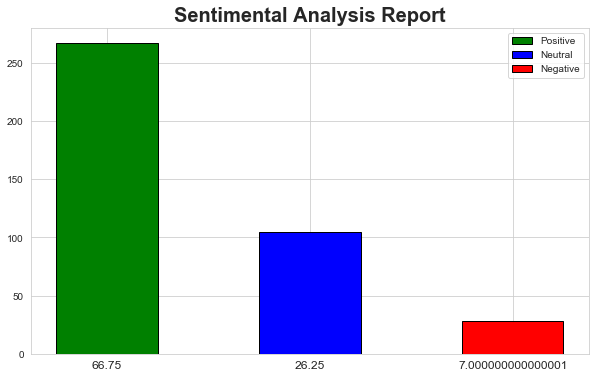

In [92]:
plt.figure(figsize = (10,6))
plt.bar(2,Sentiment_list[0],width = 1, color = 'green', edgecolor = 'black', capsize=3, label='Positive')
plt.bar(4,Sentiment_list[1],width = 1, color = 'blue', edgecolor = 'black', capsize=3, label = 'Neutral')
plt.bar(6,Sentiment_list[2],width = 1, color = 'red', edgecolor = 'black', capsize=3, label ='Negative')
plt.xticks([2,4,6], [Positive_Sentiment, Neutral_Sentiment, Negative_Sentiment],size = 12)
plt.title('Sentimental Analysis Report',size = 20, fontweight = 'bold')
plt.legend()
plt.show()